# ESPP

In [1]:
r1 = np.array((0.0, 0.0, 0.0))
r2 = np.array((2.0, 0, 0))
r3 = np.array((2, 0, 2))
r4 = np.array((2, 2, 2))

In [3]:
r21 = r2 - r1
r32 = r3 - r2
r43 = r4 - r3

In [7]:
cross_2132 = np.cross(r21, r32)
cross_3243 = np.cross(r32, r43)

In [42]:
print cross_2132
print cross_3243

[ 0. -4.  0.]
[-4.  0.  0.]


In [8]:
inv_2132 = 1.0/np.sqrt(np.dot(cross_2132, cross_2132))
inv_3243 = 1.0/np.sqrt(np.dot(cross_3243, cross_3243))

In [43]:
cos_phi = (cross_2132.dot(cross_3243))*(inv_2132*inv_3243)
phi = np.arccos(cos_phi)

print np.rad2deg(phi)

rcross = np.cross(cross_2132, cross_3243)
print rcross
signcheck = rcross.dot(r32)
if signcheck < 0.0:
    phi *= -1.0
print np.rad2deg(phi)

90.0
[ -0.  -0. -16.]
-90.0


# LAMMPS

In [40]:
n123 = np.cross(r32, r21)
n234 = np.cross(r32, r43)
inv_123 = 1.0/np.sqrt(np.dot(n123, n123))
inv_234 = 1.0/np.sqrt(np.dot(n234, n234))

In [41]:
cos_phi = -np.dot(n123*inv_123, n234*inv_234)

phi = np.arccos(cos_phi)
print np.rad2deg(phi)

signcheck = np.dot(n123*inv_123, r43)
if signcheck > 0.0:
    phi *= -1.0
    phi += 2.0*np.pi
print np.rad2deg(phi)

90.0
270.0


# Harmonic

In [44]:
deg = np.arange(-180, 180, 0.01)

In [53]:
phi0 = 100.0

def computeEnergy(phi):
    K = 1.0
    diff = phi - phi0
    if diff > 180:
        diff -= 360.0
    elif diff < -180:
        diff += 360.0
    return 0.5*K*diff**2

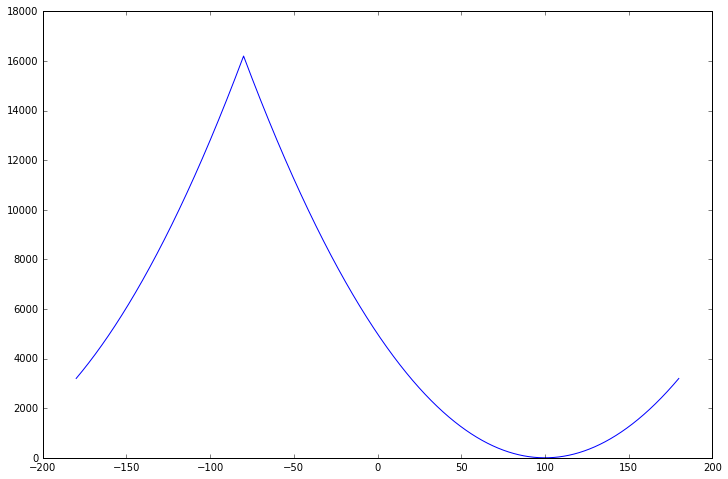

In [54]:
plt.plot(deg, map(computeEnergy, deg))